# Gradient Boosts

Important parameters given as input are -
 1. Features, Target
 2. Loss Function (It should be differentiable)
 3. Number of trees
 
It's a optimization technique works on the idea of optimizing the loss function. As optimizing loss functions involves steps which causes it to be differentiated, the loss function should be differentiable. 

Loss functions for regression - 
1. Mean squared error
2. Root mean squared error
3. Mean bias error

Loss functions for classification- 


## Step 1. 
- Base model that predicts constant value, let's assume it as mean of all target data i.e. 500k

- Update this value in Base Prediction column.

- Formula for Base Model is given as- 

$F_0$(x) = $\frac{argmin}{\gamma}$	$\sum_{i=0}^{n}$L($y_i$-$\gamma$)

where 
- $F_0$(x) means output of base model which is constant value.
- $y_i$ is the observed value.
- $\gamma$ is the Predicted value.
- L is loss function which takes observed and predicted values.

So basically this equation means that to get the constant value prediction from loss function we need to minimise the summation of loss function so we differentiate this function w.r.t $y_i$ and equate it to 0 thn we get theconstant value for $\gamma$ such that we get minimum loss.

 0 = $\frac{\partial}{\partial y_i}(\frac{1}{2}(400- \hat{y})^2+ \frac{1}{2}(500 - \hat{y})^2 + \frac{1}{2}(600 - \hat{y})^2)$
 
$\hat{y}$ = 500

- Update this value in Prediction column.



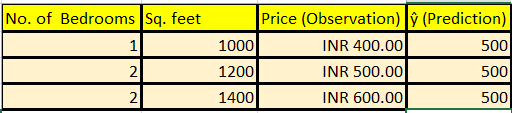

## Step 2. 

- Pseudo Residuals are found by the following formula.

$r_i$ = - ($\frac{\partial L(y_i,  F(X_i))}{\partial F(x_i)}$)

where, 
  - $F(x_i)$ is the function that gives prediction $\hat{y}$
  - $L(y_i, F(x_i))$ is the loss function which is $\frac{1}{2}(y_i - \hat{y})^2$  in our example. 
  
So Differentiating this $L(y_i,  F(X_i))$  w.r.t $F(x_i)$ basically means that differentiating $(\frac{1}{2}(y-\hat{y})^2)$ w.r.t $\hat{y}$

For first entry we get.
 
 = - $\frac{\partial(\frac{1}{2}(y-\hat{y})^2)}{\partial \hat{y}}$
 
 = -$\frac{2}{2}(y-\hat{y})(-1)$
 
 =  $(y-\hat{y})$
 
 = (400-500)
 
 = -50

- Similarly we get the residuals for every entry.

- Update this Residual values in Residual-1 column.

- This Residuals are basically the errors given by base model, and this errors are the comparison between Target value and predicted value measured by various loss functions as mentioned above. 

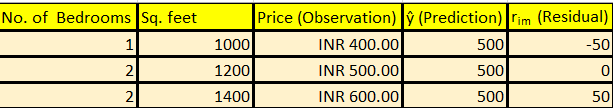

## Step 3

Now we take target i.e. dependent feature as Residual and not the price. Hence in gradient boost we consider only Residuals.

Hence we fit the Decision tree **Model-1** which is denoted by $h_m(x)$ which fits the inputs $(x_i, r_i)$

 $h_m(x)$ fits $(x_i, r_i)$
 
 where
 - $h_m(x)$ is the Decision tree 
 
 - $x_i$ are Independent features as No. of Bedrooms, Sq.feet
 
 - $r_i$ is the Dependent feature as Residuals

The output prediction of this Model-1 is also a Residual as it is fitted on Residuals as Target.

## Step 4



# Implementation of Gradient boost

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


In [63]:
data = pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

### We do not require the Name, Cabin, Ticket, PassengerId columns as they don't influence the survival.

In [64]:
data.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1, inplace=True)

### Fill the NaN values of dataset

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### We can see the Null values are present in "Age" and "Embarked" columns

<AxesSubplot:>

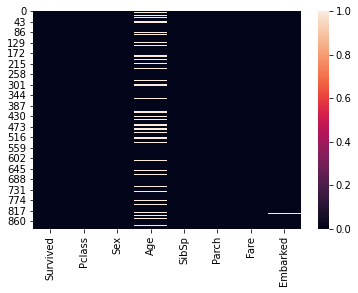

In [66]:
sns.heatmap(data.isnull())

In [74]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
# We can use interpolate function so that Null is filled with average of adjecent values

data["Embarked"] = data["Embarked"].fillna("S")

<AxesSubplot:>

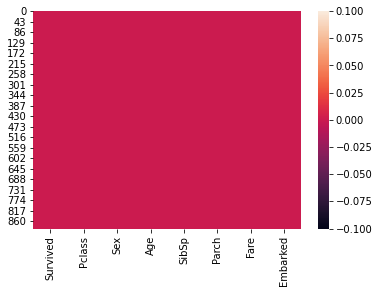

In [75]:
sns.heatmap(data.isnull())

## Convert categorical values to numeric

### We use OneHotEncoding for "Sex", "Embarked"  columns

In [76]:
Sex_dummies = pd.get_dummies(data["Sex"])
Embarked_dummies = pd.get_dummies(data["Embarked"])

data = pd.concat((data, Sex_dummies, Embarked_dummies), axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [77]:
data.drop(["Sex", "Embarked"], axis=1, inplace=True)

# Splitting the data
### Split Features and Target 

In [78]:
x = data.drop("Survived", axis=1)
y = data["Survived"]

x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


### Split into Train and Test data

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 133 to 812
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  668 non-null    int64  
 1   Age     668 non-null    float64
 2   SibSp   668 non-null    int64  
 3   Parch   668 non-null    int64  
 4   Fare    668 non-null    float64
 5   female  668 non-null    uint8  
 6   male    668 non-null    uint8  
 7   C       668 non-null    uint8  
 8   Q       668 non-null    uint8  
 9   S       668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 34.6 KB


# GradientBoostingClassifier Model

In [80]:
gb_model = GradientBoostingClassifier()

gb_model.fit(x_train, y_train)

y_pred = gr_model.predict(x_test)

GradientBoostingClassifier()

# Evaluating the model

In [81]:
gb_model.score(x_test, y_test)

0.8385650224215246

# Hyperparameter Tunning

In [ ]:
params = {"n_estimators"=250,
          "learning_rate"=0.05, 
          "max_depth"=10, 
          "max_features" = 0.8,
          "min_samples_leaf"=4, 
          "random_state"=0, 
          "subsample" =0.9,}

# Evaluating the optimized model